In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
path = '/content/drive/MyDrive/bttai-ajl-2025'
test_df = pd.read_csv(path + '/test.csv')
test_df.head(20)

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,qc,ddi_scale
0,0844ae634f0e6e7ef1f73c2aeecbae0e,2,2,NaN,12
1,3b290d262098f761d719aa07cf36c040,4,3,NaN,34
2,cf561d08ac46d0fda678bff6621005ee,2,3,NaN,12
3,e6371069be05c6b0a95b4b3f1bacc9a5,4,3,NaN,34
4,f76cddb37265f97508f159078dcc7e7c,5,5,NaN,56
5,ed522f3617a30ab79fa11e140d442e2d,1,1,NaN,12
6,13aa2de8804ae601cd45c1c4cac9bc6f,4,3,NaN,34
7,76c6ff58a8babae647dcc37ea074939d,2,1,NaN,12
8,d04ce86b818b31edf84e54444ec97295,3,5,NaN,34
9,62c9e3126c690939ea356694a047d23b,1,1,NaN,12


In [ ]:
test_df.columns

Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'qc',
       'ddi_scale'],
      dtype='object')

In [ ]:
print("frequency of ints in fitzpatrick_scale:")
print(test_df['fitzpatrick_scale'].value_counts())

print("\nfrequency of each integer in fitzpatrick_centaur:")
print(test_df['fitzpatrick_centaur'].value_counts())

frequency of ints in fitzpatrick_scale:
fitzpatrick_scale
 2    397
 3    243
 1    238
 4    186
 5     83
 6     44
-1     36
Name: count, dtype: int64

frequency of each integer in fitzpatrick_centaur:
fitzpatrick_centaur
 1    451
 2    276
 3    218
 4    107
 5     80
-1     65
 6     30
Name: count, dtype: int64


In [ ]:
nan_count = np.sum(test_df.isnull(), axis = 0)
nan_count

,0
md5hash,0
fitzpatrick_scale,0
fitzpatrick_centaur,0
qc,1198
ddi_scale,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   md5hash              1227 non-null   object
 1   fitzpatrick_scale    1227 non-null   int64 
 2   fitzpatrick_centaur  1227 non-null   int64 
 3   qc                   29 non-null     object
 4   ddi_scale            1227 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 48.1+ KB


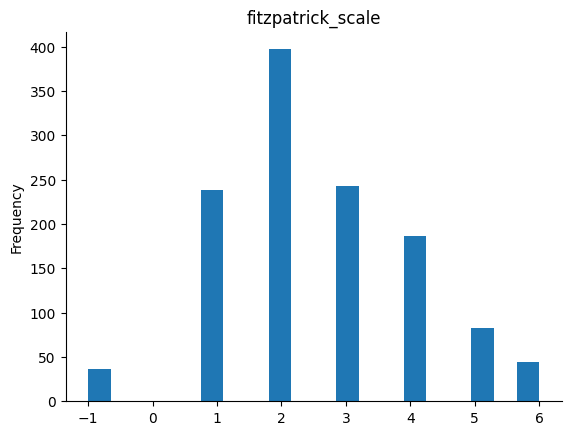

In [ ]:
test_df['fitzpatrick_scale'].plot(kind='hist', bins=20, title='fitzpatrick_scale')
plt.gca().spines[['top', 'right',]].set_visible(False)

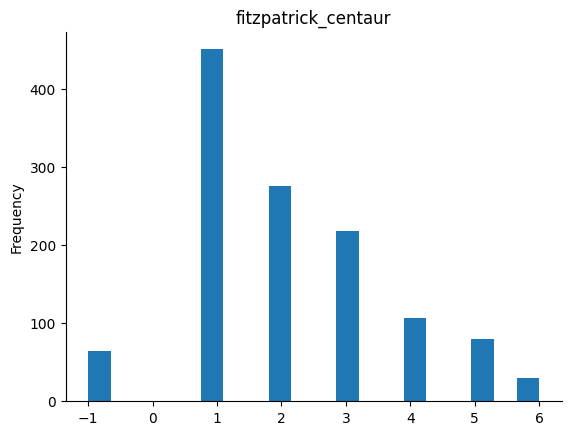

In [ ]:
test_df['fitzpatrick_centaur'].plot(kind='hist', bins=20, title='fitzpatrick_centaur')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_df = pd.read_csv(path + '/train.csv')
train_df.head(30)

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,ddi_scale
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,benign-epidermal,benign,NaN,34
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN,12
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic,56
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN,34
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,benign-epidermal,benign,NaN,12
5,9d5a90fa3f6934608add10e698001760,3,5,prurigo-nodularis,benign-epidermal,benign,NaN,34
6,57885e3f5a3c043c3621a06bca196282,2,1,seborrheic-keratosis,benign-epidermal,benign,NaN,12
7,8adbbbc4e50a0df8b89710dfd495d3c5,5,4,eczema,inflammatory,non-neoplastic,NaN,56
8,763ed484fcc50bf7b67cc44f95bac95e,-1,-1,folliculitis,inflammatory,non-neoplastic,NaN,-1
9,0198c74d604fde7055671d1b35869664,3,4,squamous-cell-carcinoma,malignant-epidermal,malignant,NaN,34


In [ ]:
train_df.columns

Index(['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label',
       'nine_partition_label', 'three_partition_label', 'qc', 'ddi_scale'],
      dtype='object')

In [ ]:
train_df['label'].unique()

array(['prurigo-nodularis', 'basal-cell-carcinoma-morpheiform', 'keloid',
       'basal-cell-carcinoma', 'seborrheic-keratosis', 'eczema',
       'folliculitis', 'squamous-cell-carcinoma', 'actinic-keratosis',
       'mycosis-fungoides', 'acne-vulgaris', 'dyshidrotic-eczema',
       'melanoma', 'epidermal-nevus', 'malignant-melanoma',
       'pyogenic-granuloma', 'dermatofibroma', 'kaposi-sarcoma', 'acne',
       'dermatomyositis', 'superficial-spreading-melanoma-ssm'],
      dtype=object)

In [ ]:
train_df['nine_partition_label'].unique()

array(['benign-epidermal', 'malignant-epidermal', 'inflammatory',
       'malignant-cutaneous-lymphoma', 'malignant-melanoma',
       'benign-dermal', 'malignant-dermal'], dtype=object)

In [ ]:
train_df['three_partition_label'].unique()

array(['benign', 'malignant', 'non-neoplastic'], dtype=object)

In [ ]:
print("frequency of ints in fitzpatrick_scale:")
print(train_df['fitzpatrick_scale'].value_counts())

print("\nfrequency of each integer in fitzpatrick_centaur:")
print(train_df['fitzpatrick_centaur'].value_counts())

frequency of ints in fitzpatrick_scale:
fitzpatrick_scale
 2    964
 3    562
 1    528
 4    393
 5    216
-1    108
 6     89
Name: count, dtype: int64

frequency of each integer in fitzpatrick_centaur:
fitzpatrick_centaur
 1    1000
 2     730
 3     489
 4     253
-1     161
 5     147
 6      80
Name: count, dtype: int64


In [ ]:
nan_count = np.sum(train_df.isnull(), axis = 0)
nan_count

,0
md5hash,0
fitzpatrick_scale,0
fitzpatrick_centaur,0
label,0
nine_partition_label,0
three_partition_label,0
qc,2770
ddi_scale,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   md5hash                2860 non-null   object
 1   fitzpatrick_scale      2860 non-null   int64 
 2   fitzpatrick_centaur    2860 non-null   int64 
 3   label                  2860 non-null   object
 4   nine_partition_label   2860 non-null   object
 5   three_partition_label  2860 non-null   object
 6   qc                     90 non-null     object
 7   ddi_scale              2860 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 178.9+ KB


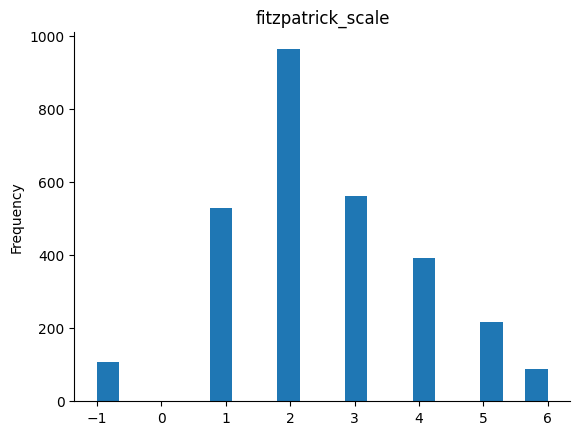

In [ ]:
train_df['fitzpatrick_scale'].plot(kind='hist', bins=20, title='fitzpatrick_scale')
plt.gca().spines[['top', 'right',]].set_visible(False)

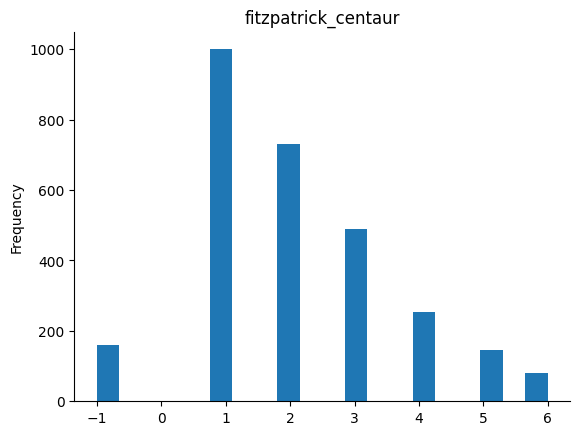

In [ ]:
train_df['fitzpatrick_centaur'].plot(kind='hist', bins=20, title='fitzpatrick_centaur')
plt.gca().spines[['top', 'right',]].set_visible(False)

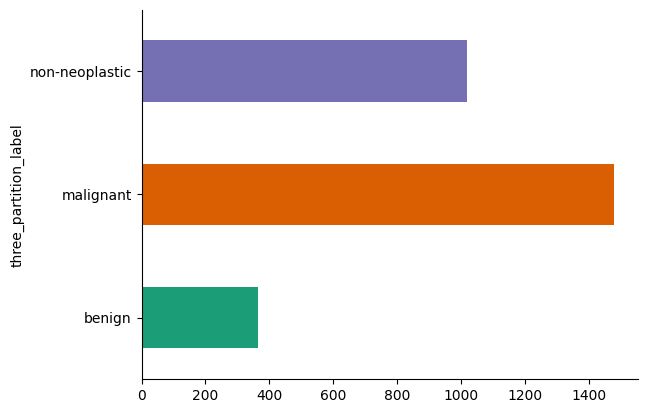

In [ ]:
train_df.groupby('three_partition_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(train_df['three_partition_label'].value_counts())

three_partition_label
malignant         1478
non-neoplastic    1017
benign             365
Name: count, dtype: int64


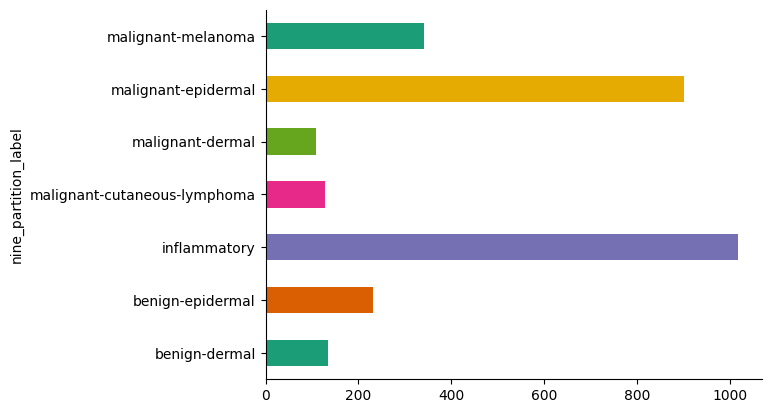

In [ ]:
train_df.groupby('nine_partition_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(train_df['nine_partition_label'].value_counts())

nine_partition_label
inflammatory                    1017
malignant-epidermal              900
malignant-melanoma               342
benign-epidermal                 231
benign-dermal                    134
malignant-cutaneous-lymphoma     127
malignant-dermal                 109
Name: count, dtype: int64


In [ ]:
# using label encoders for corr
le_label = LabelEncoder()
le_nine = LabelEncoder()
le_three = LabelEncoder()

train_df['label_encoded'] = le_label.fit_transform(train_df['label'])
train_df['nine_partition_encoded'] = le_nine.fit_transform(train_df['nine_partition_label'])
train_df['three_partition_encoded'] = le_three.fit_transform(train_df['three_partition_label'])

corr_matrix = train_df[['label_encoded', 'nine_partition_encoded', 'three_partition_encoded']].corr()
print(corr_matrix)

                         label_encoded  nine_partition_encoded  \
label_encoded                 1.000000                0.203332   
nine_partition_encoded        0.203332                1.000000   
three_partition_encoded      -0.437288               -0.114619   

                         three_partition_encoded  
label_encoded                          -0.437288  
nine_partition_encoded                 -0.114619  
three_partition_encoded                 1.000000  


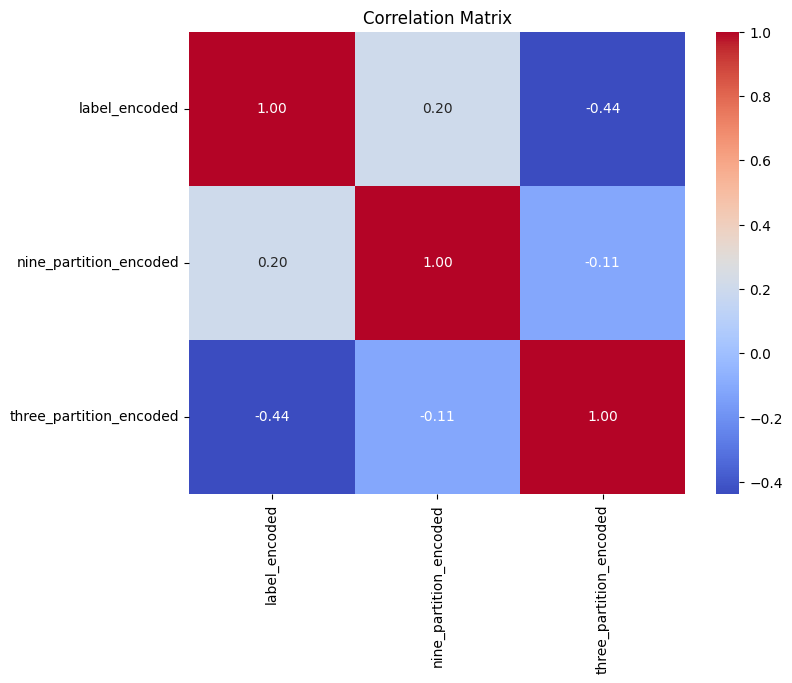

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()